# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Autores:** Juan León, Alonso Tamayo, Bruno Cerda, Ignacio Leiva<br>

----

<h1><center> Estudio del valor de la Unidad de Fomento (UF) y Tasa de Desempleo Chilena </center></h1>

## Contexto y motivación

Sin duda alguna, la economia es uno de los temas mas importante desde hace muchas decadas atrás, protagonista de cientos de debates y discusiones, por lo que siempre es un tema interesante el cual analizar. Para esta ocasión nos centraremos en dos de los mas importante indicadores economicos chilenos, la *Tasa de Desempleo* y la *Unidad de Fomento*.

En el último tiempo el desempleo y su aumento ha estado en boca de todos y no es extraño preguntarse el por qué. Hay muchos factores que pueden influir en su valor, y nos importa de sobremanera estudiar algunos de ellos como el covid y algunos de los principales índices económicos en Chile, para llegar a conclusiones que nos ayuden a comprender mejor este fenómeno.

A su vez, la unidad de fomento tiene gran importancia ya que su valor se ve directamente relacionado con la inflación y nos interesa estudiar su comportamiento en pandemia para saber si tuvo alguna consecuencia a partir de la alza en los casos y  tambien otros indicadores económicos que influyen en su valor.

Nos parecio importante no tan solo ver que tanto influyen los demas indicadores economicosen en *UF y Tasa de Desempleo* sino  tambien que tanto influyeron los casos de covid debido a que según el [Banco Mundial](https://www.bancomundial.org/es/news/press-release/2020/06/08/covid-19-to-plunge-global-economy-into-worst-recession-since-world-war-ii) , puesto que el COVID-19 ha causado la peor recesión económica desde la segunda guerra mundial, causando que la economía mundial se redujera en un 5,2%. 

Se estima que las economías avanzadas se contraerán un 7% y las economías emergentes un 2,5%, a partir de esta cifra nosotros nos preguntamos como están relacionadas las cifras económicas y el COVID-19, comparandolas con la Unidad de fomento (UF), la cual permite mantener el poder adquisitivo de los bienes de las personas afectadas por la inflacion causada por el COVID-19, y la Tasa de Desempleo, tambien empeorada llegando a un 12,9%. 


## Objetivos

Buscamos responder efectivamente que tanto afectaron la pandemia y los indicadores economicos chilenos en la Unidad de Fomento (UF) y la tasa de desempleo. El objetivo es conocer resultados mas precisos y específicos sobre como se relacionan los efectos de la pandemia con los dos indicadores economicos mencionados anteriormente de la economía del país, y de esta manera también encontrar cuales de estos fueron los mas afectados, estos resultados pueden ser de gran aporte e importancia para economistas o instituciones que busquen tomar precauciones o medidas para prevenir en primer lugar que estos efectos adversos ocurran en el futuro. 

Las preguntas que buscamos responder con nuestro análisis de los datos son las siguientes:


* ¿Cúales indicadores económicos son los que mantienen una mayor relación con la Unidad de Fomento (UF) y la tasa de desempleo, y cuales mantienen una menor relación.

* ¿Tuvo el COVID-19 una relación directa en el aumento de la tasa de desempleo?

* Considerando el periodo en donde hubo mayor tasa de contaigos de COVID-19 en el país, ¿Es posible visualizar consecuencias inmediatas en la economía del país?

* ¿Tuvo el COVID-19 consecuencias directas en el valor de la Unidad de Fomento (UF)?

* ¿Se puede crear un modelo que prediga los valores de la unidad de fomento (UF) y la tasa de desempleo en base al resto de indicadores economicos y el numero de casos de covid-19 en Chile?

## Datos utilizados.
Para esta Tarea, se utilizarán los siguientes conjuntos de datos:

### 1. Datos-COVID19 (https://github.com/MinCiencia/Datos-COVID19)

El objetivo de la Mesa de Datos COVID-19 liderada por el Ministerio de Ciencia, Tecnología, Conocimiento e Innovación es disponer de información de nuestro país durante la pandemia para promover el uso de datos para investigación científica, clínica y para soluciones innovadoras que contribuyan a la toma de decisiones de las autoridades y la ciudadanía frente a esta pandemia. Se disponen los datos epidemiológicos provenientes del Ministerio de Salud (MINSAL) y datos de otras fuentes, documentados y abiertos para el análisis de la comunidad, en concordancia con la Ley Nº 19.628.

Ver https://minciencia.gob.cl/covid19/ para más información, incluyendo actas de las reuniones de la mesa y también los informes publicados a la fecha.

Actualmente el repositorio Datos-Covid19 contiene 94 productos de datos de acceso público. Para este proyecto nosotros usaremos los siguientes conjunto de datos: **Data Product 5** (`Datos-COVID19/output/producto5/TotalesNacionales.csv`).

* Conjunto de datos que representan casos de COVID-19 a nivel nacional. Incluye casos nuevos confirmados, totales o acumulados, recuperados, etc.

* Conjunto de datos que representa el avance de la campaña de vacunación a nivel regional.

### 2. Reporte de indicadores económicos de Chile.

La API **MindicadorChile** es un servicio open source (web service) que entrega los principales indicadores económicos para Chile en formato JSON. Tanto los indicadores diarios como históricos para que desarrolladores puedan utilizarlos en sus aplicaciones o sitios web, Toda la documentación de la API está disponible en la dirección https://mindicador.cl/.

para este proyecto nos concentraremos en la mayoria de esto indicardores, concretamente los datos económicos que vamos a analizar son:

* Tasa de desempleo
* Índice Mensual de Actividad Económica (IMACEC)
* Índice precio del consumidor (IPC)
* Índice valor promedio (IVP)
* Valor del dólar
* Valor del euro
* Tasa política monetaria (TPM)
* Unidad de fomento (UF)
* Unidad Tributaria Mensual (UTM)



## Análisis exploratorio de datos:

-  Librerias a Utilizar durante el proyecto

In [1]:
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup as bs
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

- Datos Economicos.
Primero conseguimos los datos desde la API y generamos dataframes para los distintos indicadores economicos.

In [2]:
class DataFrame:
    def __init__(self, indicador, year):
        self.indicador = indicador
        self.year = year
        self.df_esqueleto = self.processing(self.get())

    def get(self):
        url = f'https://mindicador.cl/api/{self.indicador}/{self.year}'
        response = requests.get(url)
        json_data = response.json()
        df_json = pd.DataFrame(json_data)
        return df_json

    def processing(self, df_json):
        esqueleto = []
        for serie in df_json['serie']:
            esqueleto.append(serie)
        df_esqueleto = pd.DataFrame(esqueleto)
        return df_esqueleto.sort_values(by='fecha')

years = [2020, 2021]
indicadores = ['dolar', 'tasa_desempleo', 'libra_cobre', 'ipc', 'imacec', 'ivp', 'euro', 'tpm', 'uf', 'utm']
df_juntas = []

#len => [488, 22, 488, 23, 22, 731, 488, 489, 731, 24]
#dolar, libra_cobre, ivp, euro, tpm, uf

for indicador in indicadores:
    df_temporal = []
    for year in years:
        df_temporal.append(DataFrame(indicador, year).df_esqueleto)
    df_juntas.append(pd.concat(df_temporal, ignore_index=True))

Ahora que tenemos los dataframes necesarios, trabajamos aquellos que estan en formato de registro diario y los pasamos a un formato mensual, para que asi los podamos combinar todos en un mismo dataframe. 

In [3]:
def procesar(dataframe):
    mes = 1
    suma_valores = 0
    contador_meses = 0
    lista_valores_promedios = []

    for indice, fila in dataframe.iterrows():
        fecha = fila['fecha']
        fecha = fecha[:7]
        fecha_transformada = datetime.strptime(fecha[:7], '%Y-%m')
        mes_actual = fecha_transformada.month

        if mes != mes_actual:
            value = suma_valores / contador_meses
            if value == 0:
                value = 0.5
            lista_valores_promedios.append(value)
            suma_valores = 0
            contador_meses = 0
        else:
            suma_valores += int(fila['valor'])
        contador_meses += 1
        mes = mes_actual

    return lista_valores_promedios

dataframes_diarias = []
dataframes_mensuales = []
for df in df_juntas:
    if len(df) > 24:
        dataframes_diarias.append(df)
    else:
        dataframes_mensuales.append(df)

lista_promedios = []
for dataframe in dataframes_diarias:
    promedio = procesar(dataframe)
    lista_promedios.append(promedio)

lista_dataframes = []
indices = ['dolar', 'libra_cobre', 'ivp', 'euro', 'tpm', 'uf']
contador = 0
for valor in lista_promedios:
    df_nueva = pd.DataFrame(valor, columns=[indices[contador]])
    lista_dataframes.append(df_nueva)
    contador += 1

lista_mensuales = []
lista_indices = ['tasa_desempleo', 'ipc', 'imacec', 'utm']
contador = 0
for elemento in dataframes_mensuales:
    sin_fecha = elemento.drop(columns=['fecha'])
    renombrada = sin_fecha.rename({'valor':lista_indices[contador]}, axis=1)
    lista_mensuales.append(renombrada)
    contador += 1
df_economia = pd.concat(lista_dataframes+lista_mensuales, axis=1)
df_economia.head()

,dolar,libra_cobre,ivp,euro,tpm,uf,tasa_desempleo,ipc,imacec,utm
0,772.136364,2.000000,29464.225806,857.409091,1.000000,28324.032258,7.43,0.6,1.5,49673
1,755.850000,1.900000,28519.862069,824.100000,0.950000,27410.068966,7.81,0.4,2.7,49723
2,801.818182,1.909091,28673.032258,886.318182,0.954545,27620.870968,8.23,0.3,-3.5,50021
3,812.238095,1.904762,28741.800000,882.380952,0.500000,27694.366667,9.00,0.0,-14.1,50221
4,777.210526,1.894737,28874.290323,846.368421,0.500000,27787.096774,11.21,-0.1,-15.3,50372


In [4]:
casos_totales = 'datos/datos_salud/producto5/TotalesNacionales.csv'
df_casos_totales = pd.read_csv(casos_totales)
df_casos_totales = df_casos_totales.transpose()
df_casos_totales = df_casos_totales[[6]]
df_casos_totales = df_casos_totales.iloc[1: , :]
df_casos_totales = df_casos_totales.rename({6:'Casos Nuevos Diarios'}, axis=1)
df_casos_totales['Casos Nuevos Diarios'].sum()

casos_totales = 'datos/datos_salud/producto5/TotalesNacionales.csv'
df_casos_totales = pd.read_csv(casos_totales)
df_casos_totales = df_casos_totales.transpose()
df_casos_totales = df_casos_totales[[0]]
df_casos_totales = df_casos_totales.iloc[1: , :]
df_casos_totales = df_casos_totales.rename({0:'Casos Nuevos Diarios'}, axis=1)

- Datos de Salud.
Para conseguir estos datos, vamos a utilizar nuevamente la funcion de mas arriba llamada 'procesar' pero con unos cambios pequeños.

In [5]:
casos_totales = 'datos/datos_salud/producto5/TotalesNacionales.csv'
df_casos_totales = pd.read_csv(casos_totales)
df_casos_totales = df_casos_totales.transpose()
df_casos_totales = df_casos_totales[[6]]
df_casos_totales = df_casos_totales.iloc[1: , :]
df_casos_totales = df_casos_totales.rename({6:'Casos Nuevos Diarios'}, axis=1)
df_casos_totales['Casos Nuevos Diarios'].sum()

def procesar(dataframe):
    mes = 3
    suma_valores = 0
    contador_meses = 0
    lista_valores_promedios = []

    for indice, fila in dataframe.iterrows():
        # fecha = fila['fecha']
        fecha = indice
        fecha = fecha[:7]
        fecha_transformada = datetime.strptime(fecha[:7], '%Y-%m')
        mes_actual = fecha_transformada.month

        if mes != mes_actual:
            value = suma_valores
            if value == 0:
                value = 0.5
            lista_valores_promedios.append(value)
            suma_valores = 0
            contador_meses = 0
        else:
            suma_valores += int(fila['Casos Nuevos Diarios'])
        contador_meses += 1
        mes = mes_actual

    return lista_valores_promedios

dataframe_salud = pd.DataFrame(procesar(df_casos_totales), columns=['Casos Nuevos Mensuales'])
dataframe_salud.head()

,Casos Nuevos Mensuales
0,2738
1,12992
2,82680
3,142812
4,73494


Ahora simplemente juntamos las dataframes de economia y salud en una unica dataframe.


In [6]:
df_final = pd.concat([df_economia, dataframe_salud], axis=1)
df_final = df_final[:-1]
df_final = df_final.fillna(0)
df_final

,dolar,libra_cobre,ivp,euro,tpm,uf,tasa_desempleo,ipc,imacec,utm,Casos Nuevos Mensuales
0,772.136364,2.000000,29464.225806,857.409091,1.000000,28324.032258,7.43,0.6,1.5,49673,2738.0
1,755.850000,1.900000,28519.862069,824.100000,0.950000,27410.068966,7.81,0.4,2.7,49723,12992.0
2,801.818182,1.909091,28673.032258,886.318182,0.954545,27620.870968,8.23,0.3,-3.5,50021,82680.0
3,812.238095,1.904762,28741.800000,882.380952,0.500000,27694.366667,9.00,0.0,-14.1,50221,142812.0
4,777.210526,1.894737,28874.290323,846.368421,0.500000,27787.096774,11.21,-0.1,-15.3,50372,73494.0
5,754.809524,1.904762,28913.266667,850.142857,0.500000,27751.433333,12.25,-0.1,-12.4,50372,54070.0
6,746.909091,1.909091,29008.709677,856.181818,0.500000,27755.193548,13.09,0.1,-10.7,50322,49756.0
7,748.095238,2.095238,29060.161290,884.523810,0.500000,27742.451613,12.93,0.1,-11.3,50272,45383.0
8,736.000000,2.666667,29056.633333,867.619048,0.500000,27737.533333,12.35,0.6,-5.3,50322,39880.0
9,750.333333,2.666667,29112.709677,883.476190,0.500000,27834.064516,11.58,0.7,-1.2,50372,56092.0


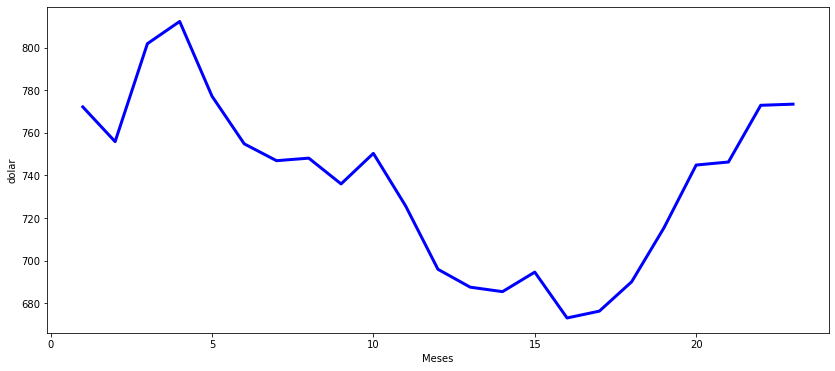

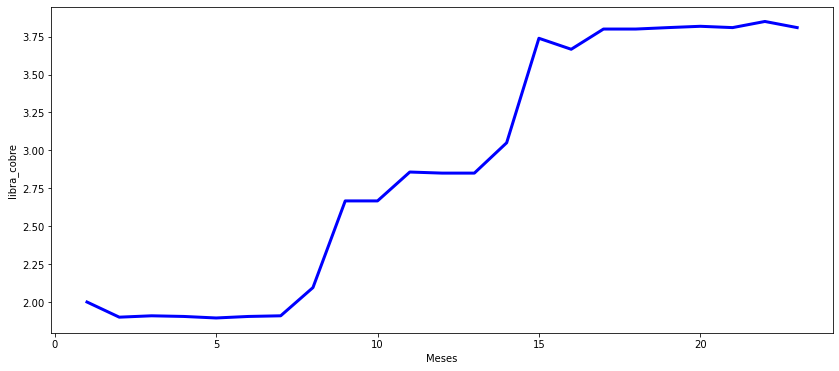

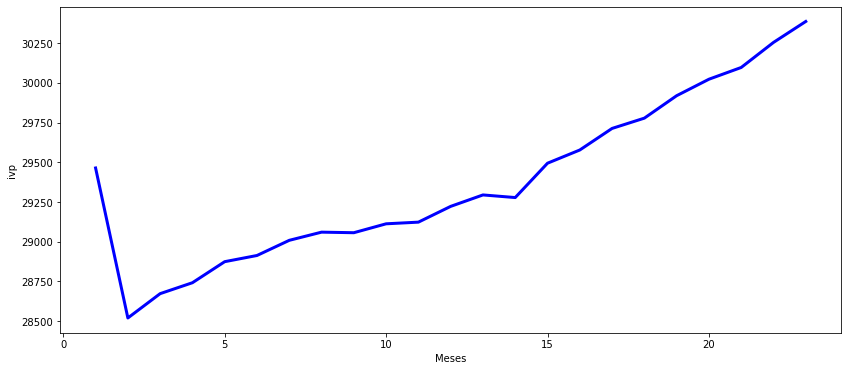

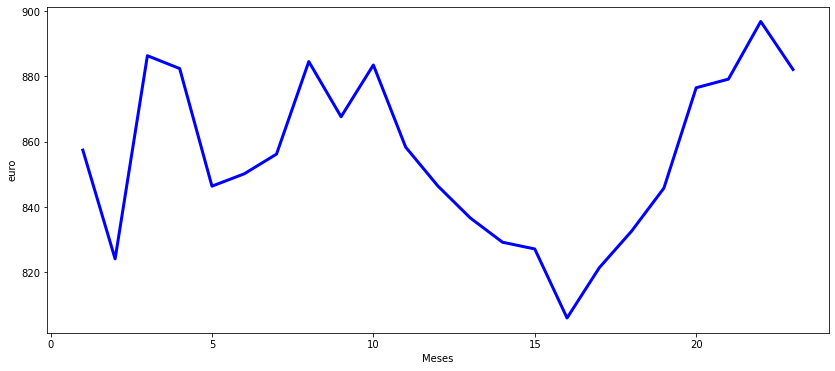

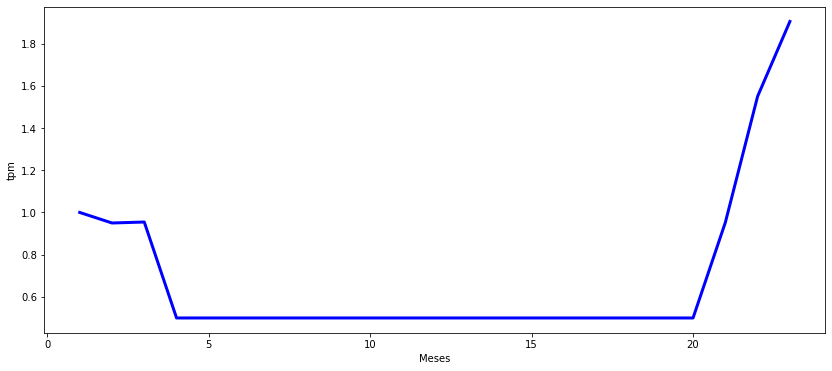

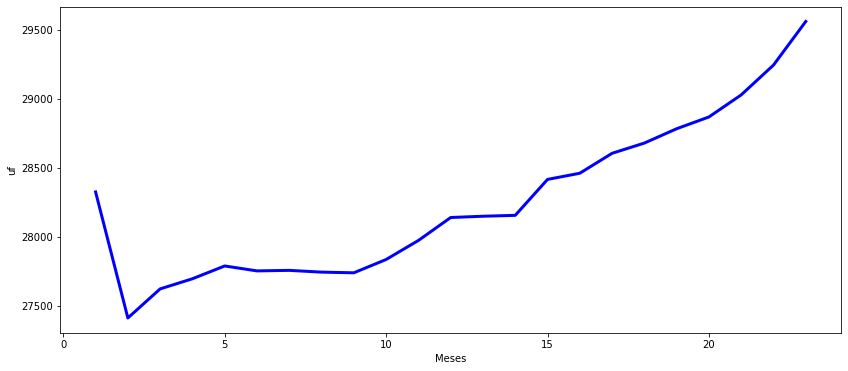

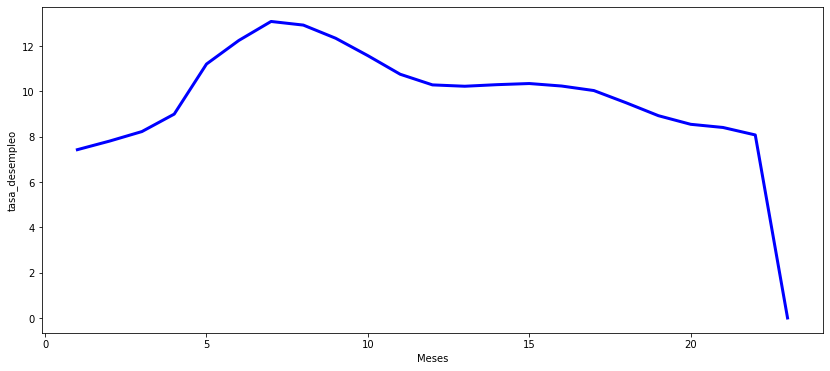

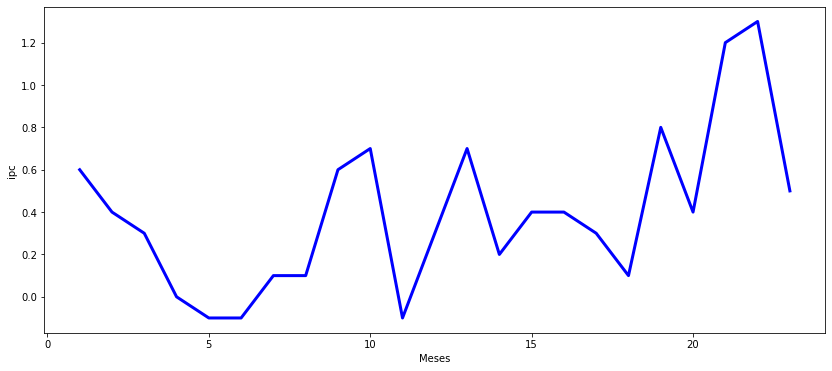

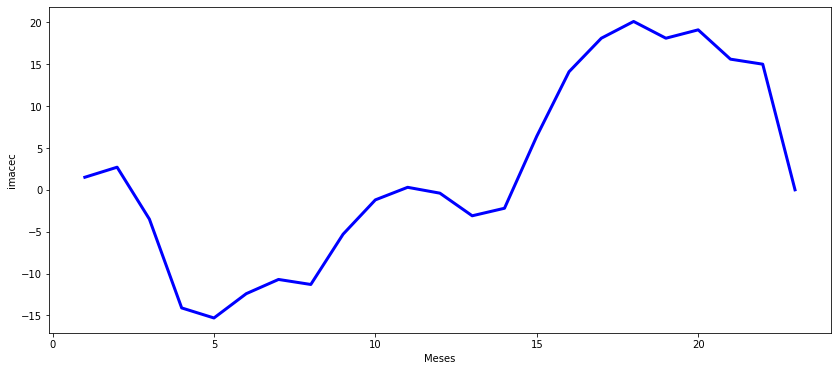

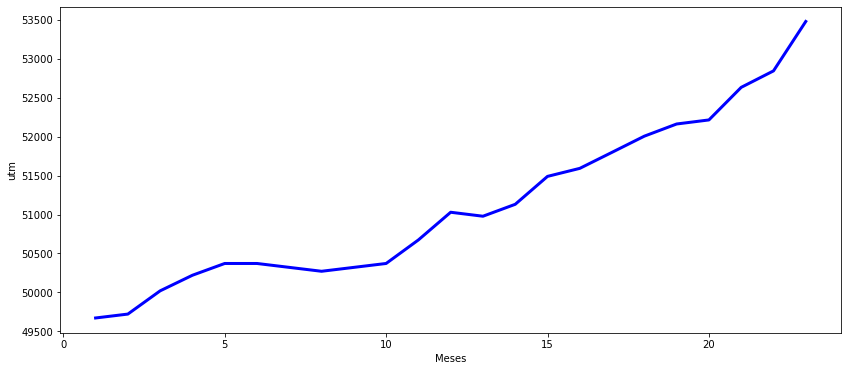

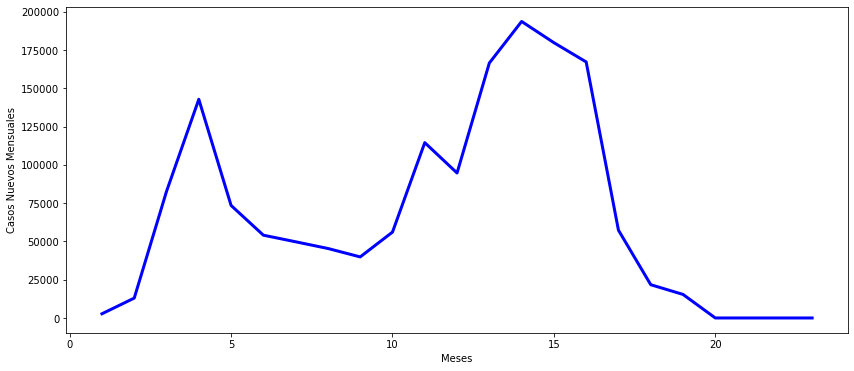

In [7]:
meses = tuple(range(1, 24))
for col in df_final.columns:
    fig = plt.figure(figsize=(14, 6))

    #Genora los puntos que conforman el grafico
    plt.plot(meses, df_final[col], linewidth=3, c='blue', )

    #nombre de los ejes
    plt.ylabel(f"{col}")
    plt.xlabel("Meses")

    plt.show()

### ¿Cúales indicadores económicos son los que mantienen una mayor relación con la Unidad de Fomento (UF) y la tasa de desempleo, y cuales mantienen una menor relación?

In [8]:
# Consideramos el tan solo los indicadores economicos
df_eco = df_final.drop('Casos Nuevos Mensuales', axis=1) 

In [9]:
#Correlacion
df_eco.corr()

,dolar,libra_cobre,ivp,euro,tpm,uf,tasa_desempleo,ipc,imacec,utm
dolar,1.000000,-0.539147,-0.250661,0.752810,0.452332,-0.194611,-0.275118,-0.003010,-0.463391,-0.268206
libra_cobre,-0.539147,1.000000,0.880774,-0.146728,0.200867,0.863752,-0.359755,0.501113,0.848728,0.905503
ivp,-0.250661,0.880774,1.000000,0.117129,0.467082,0.986595,-0.531611,0.590954,0.736776,0.928580
euro,0.752810,-0.146728,0.117129,1.000000,0.438480,0.112175,-0.207636,0.284918,-0.221171,0.076597
tpm,0.452332,0.200867,0.467082,0.438480,1.000000,0.548098,-0.827387,0.485769,0.141663,0.451163
uf,-0.194611,0.863752,0.986595,0.112175,0.548098,1.000000,-0.634103,0.563429,0.710701,0.944571
tasa_desempleo,-0.275118,-0.359755,-0.531611,-0.207636,-0.827387,-0.634103,1.000000,-0.328213,-0.301591,-0.541221
ipc,-0.003010,0.501113,0.590954,0.284918,0.485769,0.563429,-0.328213,1.000000,0.527179,0.489930
imacec,-0.463391,0.848728,0.736776,-0.221171,0.141663,0.710701,-0.301591,0.527179,1.000000,0.684054
utm,-0.268206,0.905503,0.928580,0.076597,0.451163,0.944571,-0.541221,0.489930,0.684054,1.000000


<AxesSubplot:>

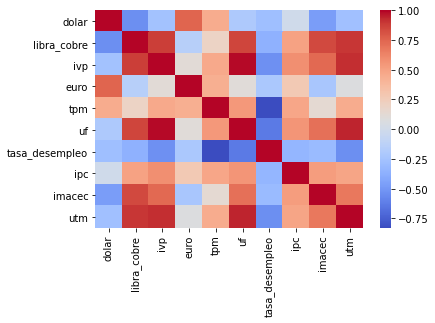

In [10]:
sns.heatmap(df_eco.corr(), cmap='coolwarm')

Despues de ver sus resultados de correlación podemos observar que los indicadores de la libra de cobre, ivp, iamcec, tasa de desempleo y utm mantienen una correlación alta con la uf, mientras que el tpm y la uf son lo que más se relacionan con la tasa de desempleo.

### ¿Tuvo el COVID-19 una relación directa en el aumento de la tasa de desempleo? 

In [11]:
df_final[["tasa_desempleo", "Casos Nuevos Mensuales"]].corr()

,tasa_desempleo,Casos Nuevos Mensuales
tasa_desempleo,1.0000,0.3271
Casos Nuevos Mensuales,0.3271,1.0000


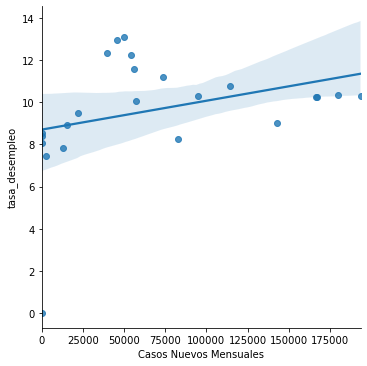

In [12]:
#graficamos para ver si logramos observar alguna relación entre los casos de covid y el resto de varibles

sns.lmplot(data=df_final, x='Casos Nuevos Mensuales', y="tasa_desempleo");

A pesar de que el gráfico da a pensar que puede haber una relación directa, al ver la correlación que mantiene la tasa de desempleo y el número de casos nuevos por mes notamos que es un valor muy bajo (cercano a 0.3) por lo que no se puede afirmar que la pandemia fue el principal factor de la alza em la tasa de desempleo.

### Considerando el periodo en donde hubo mayor tasa de contaigos de COVID-19 en el país, ¿Es posible visualizar consecuencias inmediatas en la economía del país?

In [13]:
df_final #Observamos los valores de casos nuevos para encontrar el periodo en el que hubo más.

,dolar,libra_cobre,ivp,euro,tpm,uf,tasa_desempleo,ipc,imacec,utm,Casos Nuevos Mensuales
0,772.136364,2.000000,29464.225806,857.409091,1.000000,28324.032258,7.43,0.6,1.5,49673,2738.0
1,755.850000,1.900000,28519.862069,824.100000,0.950000,27410.068966,7.81,0.4,2.7,49723,12992.0
2,801.818182,1.909091,28673.032258,886.318182,0.954545,27620.870968,8.23,0.3,-3.5,50021,82680.0
3,812.238095,1.904762,28741.800000,882.380952,0.500000,27694.366667,9.00,0.0,-14.1,50221,142812.0
4,777.210526,1.894737,28874.290323,846.368421,0.500000,27787.096774,11.21,-0.1,-15.3,50372,73494.0
5,754.809524,1.904762,28913.266667,850.142857,0.500000,27751.433333,12.25,-0.1,-12.4,50372,54070.0
6,746.909091,1.909091,29008.709677,856.181818,0.500000,27755.193548,13.09,0.1,-10.7,50322,49756.0
7,748.095238,2.095238,29060.161290,884.523810,0.500000,27742.451613,12.93,0.1,-11.3,50272,45383.0
8,736.000000,2.666667,29056.633333,867.619048,0.500000,27737.533333,12.35,0.6,-5.3,50322,39880.0
9,750.333333,2.666667,29112.709677,883.476190,0.500000,27834.064516,11.58,0.7,-1.2,50372,56092.0


Notamos que los índices del 12 al 15 corresponen al período de mayor número de nuevos contagiados, por lo que lo recortaremos desde el inicio de ese periodo. Pero primero normalizaremos los datos por la gran diferencia que hay entre los valores

In [14]:
#normalizamos los datos para llevarlos a una misma escala y asi visualizarlos todos en un solo grafico
scaler = StandardScaler()
dat_np = scaler.fit_transform(df_final)

indices = [i for i in range(len(df_final))]
df_norm = pd.DataFrame(dat_np, index=indices, columns=df_final.columns)

df_norm = df_norm.iloc[12:]

df_norm




,dolar,libra_cobre,ivp,euro,tpm,uf,tasa_desempleo,ipc,imacec,utm,Casos Nuevos Mensuales
12,-1.239627,-0.054987,-0.154709,-0.760451,-0.508065,-0.178504,0.229353,0.825073,-0.474526,-0.134213,1.575935
13,-1.292933,0.195272,-0.187136,-1.060976,-0.508065,-0.166951,0.256247,-0.530404,-0.394537,0.013610,2.011585
14,-1.060454,1.057578,0.237377,-1.144461,-0.508065,0.296093,0.275457,0.011787,0.369806,0.359497,1.789259
15,-1.606538,0.966904,0.400646,-1.996842,-0.508065,0.375720,0.233195,0.011787,1.054159,0.459011,1.587296
16,-1.525190,1.133743,0.667204,-1.375621,-0.508065,0.632698,0.156354,-0.259309,1.409667,0.658041,-0.175654
17,-1.176169,1.133743,0.794286,-0.923824,-0.508065,0.764675,-0.051116,-0.801499,1.587421,0.858037,-0.747155
18,-0.534393,1.145660,1.071638,-0.392885,-0.508065,0.949230,-0.270112,1.096168,1.409667,1.008758,-0.849067
19,0.215186,1.156494,1.275217,0.847060,-0.508065,1.100986,-0.416109,0.011787,1.498544,1.058999,-1.095849
20,0.251284,1.145660,1.420472,0.953670,0.717973,1.385712,-0.469898,2.180549,1.187474,1.462855,-1.095849
21,0.926844,1.196308,1.730055,1.665942,2.337634,1.769838,-0.596685,2.451644,1.134148,1.666715,-1.095849


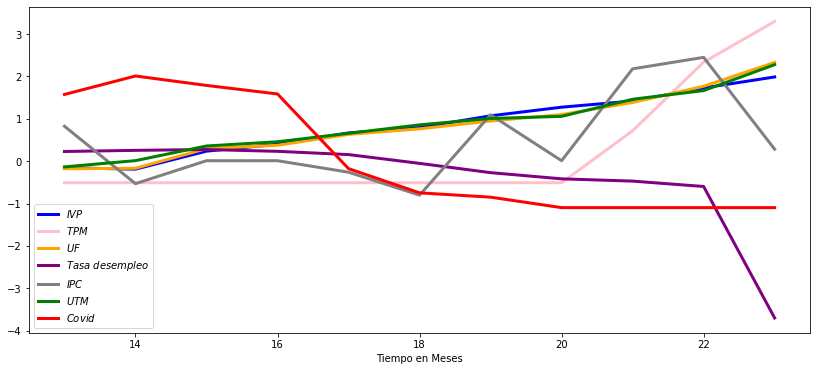

In [29]:
fig = plt.figure(figsize=(14, 6))
meses = tuple(range(13,24))

#plt.plot(meses, df_norm['dolar'], linewidth=3, c='green', label=r'$Huevos,\ crías$')
#plt.plot(meses, df_norm['libra_cobre'], linewidth=3, c='red', label=r'$Juveniles\ pequeños$')
#plt.plot(meses, df_norm['euro'], linewidth=3, c='black', label=r'$Subadultos$')
plt.plot(meses, df_norm['ivp'], linewidth=3, c='blue', label=r'$IVP$')
plt.plot(meses, df_norm['tpm'], linewidth=3, c='pink', label=r'$TPM$')
plt.plot(meses, df_norm['uf'], linewidth=3, c='orange', label=r'$UF$')
plt.plot(meses, df_norm['tasa_desempleo'], linewidth=3, c='purple', label=r'$Tasa\ desempleo$')
plt.plot(meses, df_norm['ipc'], linewidth=3, c='gray', label=r'$IPC$')
plt.plot(meses, df_norm['utm'], linewidth=3, c='green', label=r'$UTM$')
plt.plot(meses, df_norm['Casos Nuevos Mensuales'], linewidth=3, c='red', label=r'$Covid$')

plt.xlabel("Tiempo en Meses")
plt.legend()

Notamos que cuando se presenta el mayor índice de covid en el país el IPC muestra una bajada en su valor, mientras que la tasa dedesempleo y el UTM mantienen un crecimiento moderado, y finalmente la tasa de desempleo comienza a disminuír su valor mientras los casos de covid-19 lo hacen.

### ¿Tuvo el COVID-19 consecuencias directas en el valor de la Unidad de Fomento (UF)?

In [16]:
df_final[["uf", "Casos Nuevos Mensuales"]].corr()

,uf,Casos Nuevos Mensuales
uf,1.000000,-0.331252
Casos Nuevos Mensuales,-0.331252,1.000000


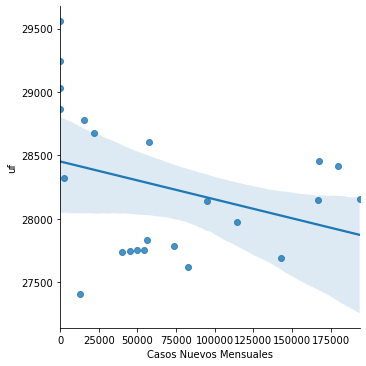

In [17]:

#graficamos para ver si logramos observar alguna relación entre los casos de covid y el resto de varibles

sns.lmplot(data=df_final, x='Casos Nuevos Mensuales', y="uf");

A pesar de que el gráfico da a pensar que puede haber una relación inversa, al ver la correlación que mantiene la tasa de desempleo y el número de casos nuevos por mes notamos que es un valor muy bajo (cercano a -0.3) por lo que no se puede afirmar que la pandemia fue el principal factor de una disminución del crecimiento de la uf.

### ¿Se puede crear un modelo que prediga los valores de la unidad de fomento (UF) y la tasa de desempleo en base al resto de indicadores economicos y el numero de casos de covid-19 en Chile?

Para esto se usarán dos modelos de predicción, una para la unidad de fomento (UF) y otra para la tasa de desempleo, cada una será puesta a prueba en las variantes de regresión lineal, de Lasso y de Ridge, probando diversos valores de alpha para encontrar el que mejor se adapta.

#### Modelo de predicción del valor de la UF

In [18]:
x = df_final[["libra_cobre", "ivp", "imacec", "utm", "tasa_desempleo"]]
y = df_final["uf"]

columns = x.columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

linreg = LinearRegression() 
linreg.fit(x_train, y_train) 

# Hacemos las predicciones para train y test
y_pred_train=linreg.predict(x_train) 

y_pred_test = linreg.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train) 
r2_train = linreg.score(x_train, y_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = linreg.score(x_test, y_test)
print(f"R2 de entrenamiento: {r2_train} ----- R2 de prueba: {r2_test}")
print(f"MSE de entrenamiento: {mse_train} ----- MSE de prueba: {mse_test}")

R2 de entrenamiento: 0.9951480870315337 ----- R2 de prueba: 0.9783480866724779
MSE de entrenamiento: 1463.544531300639 ----- MSE de prueba: 7330.1044946381135


In [19]:
from sklearn.model_selection import GridSearchCV

model=Ridge() # Creamos el modelo de ridge

alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]) # Creamos array con los alphas a probar

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # Creamos grid para calcular los mejores valores de alpha
grid.fit(x_train, y_train) # Se entrena
# print(grid)
print(grid.best_score_)
score_ridge = grid.best_score_
print(grid.best_estimator_.alpha)

-0.5427820438549462
0.0001


In [20]:
from sklearn.model_selection import GridSearchCV

model=Lasso() # Creamos el modelo de ridge

alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) # Creamos array con los alphas a probar

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # Creamos grid para calcular los mejores valores de alpha
grid.fit(x_train, y_train) # Se entrena
#print(grid)
print(grid.best_score_)
score_ridge = grid.best_score_
print(grid.best_estimator_.alpha)

-0.5427217303136812
0.0001


Como podemos observar, el modelo que mejor se adapta es el primero, es decir, el lineal regular, que presenta valores de r2 cercanos a 0.97, lo cual es muy bueno, y valores de 1463 y 7330 en error cuadrático medio para entrenamiento y prueba respectivamente.

#### Modelo de predicción del valor de la tasa de desempleo

In [21]:
x = df_final[["tpm", "uf"]]
y = df_final["tasa_desempleo"]

columns = x.columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

linreg = LinearRegression() 
linreg.fit(x_train, y_train) 

# Hacemos las predicciones para train y test
y_pred_train=linreg.predict(x_train) 

y_pred_test = linreg.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train) 
r2_train = linreg.score(x_train, y_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = linreg.score(x_test, y_test)
print(f"R2 de entrenamiento: {r2_train} ----- R2 de prueba: {r2_test}")
print(f"MSE de entrenamiento: {mse_train} ----- MSE de prueba: {mse_test}")
score_lineal = r2_test

R2 de entrenamiento: 0.8997003438368518 ----- R2 de prueba: -3.3376491503836565
MSE de entrenamiento: 0.9139411237970732 ----- MSE de prueba: 5.948209427575903


In [24]:
from sklearn.model_selection import GridSearchCV

model=Ridge() # Creamos el modelo de ridge

alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]) # Creamos array con los alphas a probar

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # Creamos grid para calcular los mejores valores de alpha
grid.fit(x_train, y_train) # Se entrena
# print(grid)
print(grid.best_score_)
score_ridge = grid.best_score_
print(grid.best_estimator_.alpha)

0.650808593027979
0.0001


In [23]:
from sklearn.model_selection import GridSearchCV

model=Lasso() # Creamos el modelo de ridge

alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) # Creamos array con los alphas a probar

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # Creamos grid para calcular los mejores valores de alpha
grid.fit(x_train, y_train) # Se entrena
# print(grid)
print(grid.best_score_)
score_ridge = grid.best_score_
print(grid.best_estimator_.alpha)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])})
0.6507897581998277
0.0001


De los tres modelos de regresión, el que mejor se adapta a nuestras variables de predicción es el de Ridge con un valor r2 de 0.6508, el cual es un valor aceptable, pero no lo suficientemente alto para asegurar que podemos predecir la tasa de desempleo.

## Conclusiones

**1- ¿Cúales indicadores económicos son los que mantienen una mayor relación con la Unidad de Fomento (UF) y la tasa de desempleo, y cuales mantienen una menor relación**: Concluimos que la *libra del cobre, IVP, Tase de desempleo y UTM*, mantienen una fuerte relación con la *UF*, y el *TPM* y la *UF* se relaciona con  la *Tasa de desempleo*.

**2- ¿Tuvo el COVID-19 una relación directa en el aumento de la tasa de desempleo?**: No pudimos afirmar que el covid fue el principal factor de la alza de la tasa de desmpleos ya que no existe una fuerte relación entre estos. 

**3-Considerando el periodo en donde hubo mayor tasa de contaigos de COVID-19 en el país, ¿Es posible visualizar consecuencias inmediatas en la economía del país?**: Logramos notar que cuando se observa un mayor indice de casos de covid, el IPC muestra una bajada en su valor, mientras que la Tasa de desempleo y el UTM mantienen un crecimineto moderado, finalmente cuando los casos de covid se estabilizan, la tasa de desemplo baja fuertemente.

**4-¿Tuvo el COVID-19 consecuencias directas en el valor de la Unidad de Fomento (UF)?**: No pudimos afirmar comodamente que el covid-19 es principal factor de la disminución del creciemiento del UF ya que no existe una fuerte relación entre estos

**5-¿Se puede crear un modelo que prediga los valores de la unidad de fomento (UF) y la tasa de desempleo en base al resto de indicadores economicos y el numero de casos de covid-19 en Chile?**: 
- **Modelo predictorio Unidad de fomento**: Logramos ver que si podemos obtener un modelo optimo, el cual seria un modelo de regresion lineal el cual cuenta con un R2  en los datos de prueba de 0.97 
- **Modelo predictorio Tasa de Desempleo**: En este caso el mejor modelo que logramos obtener es un modelo realizado con regresión Ridge el cual cuenta con un R2 en los datos de prueba de 0.65, lo cual no es suficiente para asegurar construir un modelo optimo de predicción.